In [1]:
import pandas as pd
import numpy as np

In [2]:
tweet = pd.read_csv("C:\\Users\\SHUBHAM\\Downloads\\Elon_musk.csv")
tweet

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [3]:
tweet.isnull().sum()

Unnamed: 0    0
Text          0
dtype: int64

In [4]:
# there are no any empty rows

In [5]:
# Now we will remove the space at the starting and ending of each tweet :-

tweet = [i.strip() for i in tweet.Text]

###   joinng the tweets :-

In [6]:

tweets = ' '.join(tweet)

# converting the tweets in lower-case :-

tweets.lower()


'@kunalb11 i�m an alien @id_aa_carmack ray tracing on cyberpunk with hdr is next-level. have you tried it? @joerogan @spotify great interview! @gtera27 doge is underestimated @teslacn congratulations tesla china for amazing execution last year. now on to the next for even more!! happy new year of the ox! https://t.co/9wfkmyu2oj frodo was the underdoge,\nall thought he would fail,\nhimself most of all. https://t.co/zgxjfdzzrm @owensparks_ @flcnhvy @anonyx10 haha thanks :) @flcnhvy @anonyx10 indeed! tweets definitely do not represent real-world time allocation. the most entertaining outcome is the most likely @givedirectly just sent some just agree to do clubhouse with @kanyewest https://t.co/3rwe9uhsts @geoffkeighley @unrealengine it�s getting real bought some dogecoin for lil x, so he can be a toddler hodler @joshmanmode he definitely has issues, but the sentencing seems a bit high @freewalletorg thanks for fixing @freewalletorg please unlock my account @astrojordy <u+0001f923><u+0001f

### removing punctuation :-

In [7]:
import string

In [8]:
no_punc_tweet = tweets.translate(str.maketrans(' ',' ',string.punctuation))
no_punc_tweet.lower()

'kunalb11 i�m an alien idaacarmack ray tracing on cyberpunk with hdr is nextlevel have you tried it joerogan spotify great interview gtera27 doge is underestimated teslacn congratulations tesla china for amazing execution last year now on to the next for even more happy new year of the ox httpstco9wfkmyu2oj frodo was the underdoge\nall thought he would fail\nhimself most of all httpstcozgxjfdzzrm owensparks flcnhvy anonyx10 haha thanks  flcnhvy anonyx10 indeed tweets definitely do not represent realworld time allocation the most entertaining outcome is the most likely givedirectly just sent some just agree to do clubhouse with kanyewest httpstco3rwe9uhsts geoffkeighley unrealengine it�s getting real bought some dogecoin for lil x so he can be a toddler hodler joshmanmode he definitely has issues but the sentencing seems a bit high freewalletorg thanks for fixing freewalletorg please unlock my account astrojordy u0001f923u0001f923 this is true power haha httpstcofc9uhqsd7o freewalletorg

### Tokenization :-

In [9]:
import nltk
from nltk.tokenize import word_tokenize

In [10]:
tweet_token = word_tokenize(no_punc_tweet.lower())
tweet_token[0:10]

['kunalb11',
 'i�m',
 'an',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'on',
 'cyberpunk',
 'with']

In [11]:
len(tweet_token)

21122

### Removing stop-words :-

In [12]:
from nltk.corpus import stopwords

In [13]:
my_stop_words = stopwords.words('english')

In [14]:
stopword = pd.read_csv("C:\\Users\\SHUBHAM\\Downloads\\stop.txt")

# above list of stop-word is given in the question hence add this stopds to the stopwords from english


In [15]:
my_stop_words.extend(stopword)

In [16]:
no_stop_token = [word for word in tweet_token if not word in my_stop_words]
no_stop_token[0:10]

['kunalb11',
 'i�m',
 'alien',
 'idaacarmack',
 'ray',
 'tracing',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tried']

In [17]:
len(no_stop_token)

15024

### Stemming :-

In [18]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stem_token = [ps.stem(word) for word in no_stop_token]
stem_token[0:10]

['kunalb11',
 'i�m',
 'alien',
 'idaacarmack',
 'ray',
 'trace',
 'cyberpunk',
 'hdr',
 'nextlevel',
 'tri']

In [19]:
len(stem_token)

15024

### Feature Extraction using count-vectorizer :-

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

In [21]:
X = vectorizer.fit_transform(stem_token)

In [22]:
vectorizer.vocabulary_

{'kunalb11': 2633,
 'alien': 236,
 'idaacarmack': 2395,
 'ray': 3483,
 'trace': 4319,
 'cyberpunk': 945,
 'hdr': 1638,
 'nextlevel': 3064,
 'tri': 4337,
 'joerogan': 2556,
 'spotifi': 3958,
 'great': 1572,
 'interview': 2485,
 'gtera27': 1591,
 'doge': 1090,
 'underestim': 4480,
 'teslacn': 4172,
 'congratul': 846,
 'tesla': 4166,
 'china': 733,
 'amaz': 260,
 'execut': 1289,
 'last': 2652,
 'year': 4740,
 'next': 3063,
 'even': 1264,
 'happi': 1619,
 'new': 3060,
 'ox': 3200,
 'httpstco9wfkmyu2oj': 1822,
 'frodo': 1459,
 'underdog': 4479,
 'thought': 4244,
 'would': 4716,
 'fail': 1327,
 'httpstcozgxjfdzzrm': 2355,
 'owenspark': 3197,
 'flcnhvi': 1397,
 'anonyx10': 288,
 'haha': 1605,
 'thank': 4206,
 'inde': 2441,
 'tweet': 4370,
 'definit': 1000,
 'repres': 3556,
 'realworld': 3507,
 'time': 4262,
 'alloc': 239,
 'entertain': 1222,
 'outcom': 3178,
 'like': 2709,
 'givedirectli': 1538,
 'sent': 3742,
 'agre': 207,
 'clubhous': 775,
 'kanyewest': 2591,
 'httpstco3rwe9uhst': 1760,
 'g

In [23]:
vectorizer.get_feature_names()


['005',
 '10',
 '100',
 '1000',
 '10000',
 '100kg',
 '100m',
 '107',
 '10pm',
 '10x',
 '11',
 '112',
 '11thhour',
 '12',
 '122m',
 '13',
 '130pm',
 '13arm13arm',
 '13ericralph31',
 '14',
 '140pm',
 '149watt',
 '14yearold',
 '15',
 '150',
 '150m',
 '155mph',
 '15km',
 '16',
 '162',
 '17',
 '18',
 '1880',
 '1b',
 '1m',
 '1matthewgarcia',
 '1st',
 '1stprinciples4l',
 '20',
 '2007',
 '2008',
 '2009',
 '200mph',
 '2012',
 '2017',
 '2020',
 '2021',
 '2024',
 '2026',
 '2030',
 '20k',
 '20km',
 '20m',
 '210',
 '218',
 '21st',
 '22',
 '225',
 '23',
 '230',
 '24',
 '240am',
 '247teslanew',
 '25',
 '250',
 '250kw',
 '25d',
 '25gunsteslacom',
 '25k',
 '25th',
 '28',
 '28delayslat',
 '28th',
 '29',
 '2k',
 '2m',
 '2nd',
 '2v',
 '30',
 '300',
 '300km',
 '301',
 '304',
 '304l',
 '30km',
 '30m',
 '31',
 '33',
 '330',
 '360',
 '37',
 '3800',
 '394',
 '39a',
 '3d',
 '3pm',
 '3rd',
 '40',
 '400',
 '42',
 '420',
 '4227',
 '430',
 '43rd',
 '445pm',
 '448',
 '4530000',
 '45thspacew',
 '4680',
 '479000',
 '4

### Visualization :-

In [76]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread


In [79]:
wordcloud = WordCloud(width=3000, height=2000, stopwords=my_stop_words, background_color='black', 
                      max_words=100, colormap='Set2').generate(no_punc_tweet)

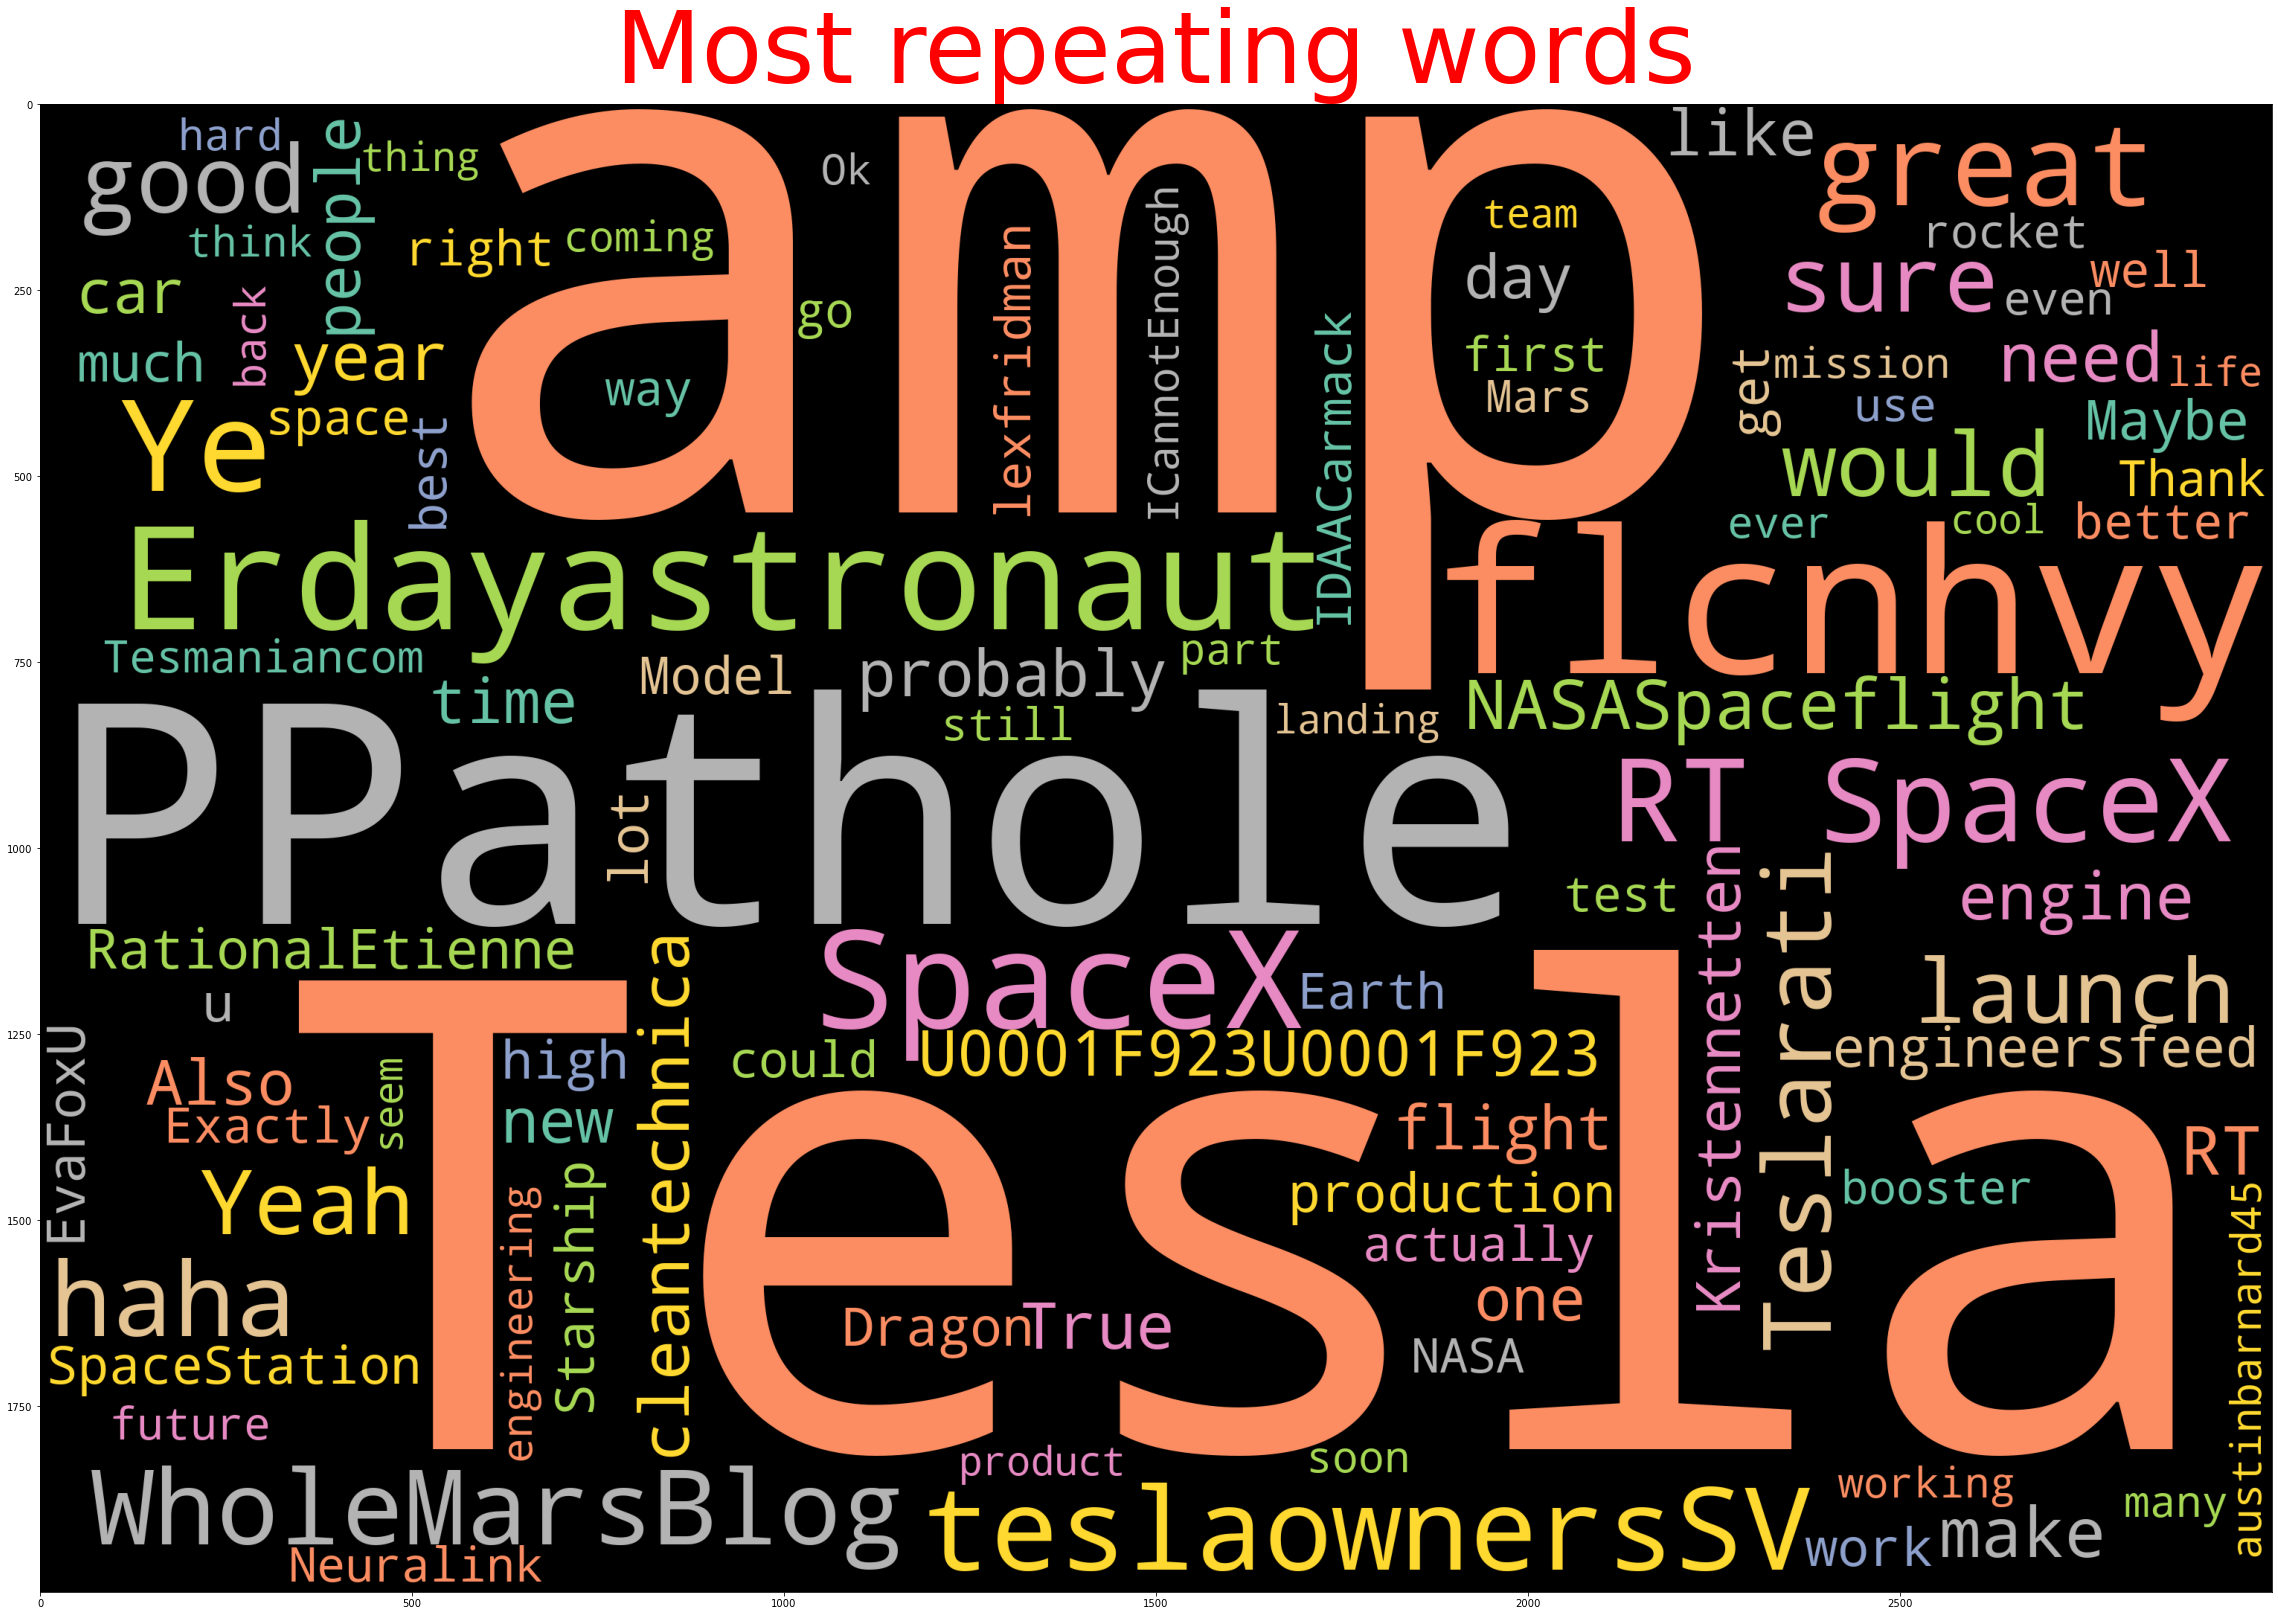

In [87]:
plt.figure(figsize=(40,30))
plt.title('Most repeating words',fontsize=100, color='red')
plt.imshow(wordcloud)